# Applying Euclidean distance only to High level features / BoxCox chosen selectively

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot, loadCoverGroups
import numpy as np
from sklearn.preprocessing import StandardScaler
from ipynb.fs.full.Pipeline import removeConstantFeatures, applyBoxCoxAllFeatures, centerAndScale, applyEuclideanDistance, getIndexAndVector, applyBoxCoxFeatures

In [2]:
df = pd.read_csv('./data/unified/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/unified/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [3]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)
featuresToScale = featuresToScale.iloc[:, 2:]
df = featuresToScale

In [4]:
df.id = df.id.astype('int64')
# Saving idChords
ids = df.id
df = df.set_index('id')
df.reset_index(drop=True, inplace=True)

In [5]:
df = df[['speechiness' ,'danceability', 'energy', 'acousticness', 'liveness', 'valence', 'tempo']]

In [6]:
df.head(1)

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
0,0.0432,0.494,0.756,0.0014,0.164,0.589,133.337


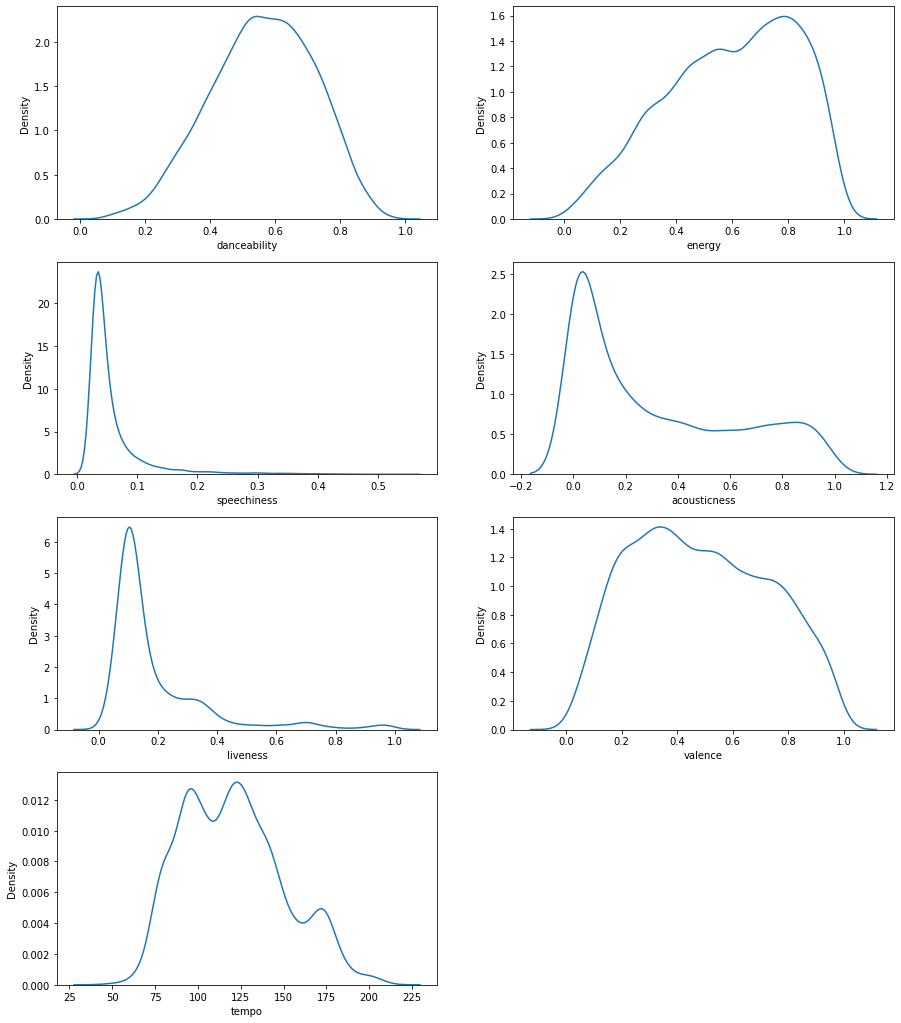

In [7]:
createKDeplot(df,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Pipeline

In [8]:
df.loc[df.valence < 0]

,speechiness,danceability,energy,acousticness,liveness,valence,tempo


In [9]:
df.describe()

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
count,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,0.058008,0.561025,0.597416,0.320264,0.190890,0.485256,120.463851
std,0.052337,0.158634,0.229335,0.312234,0.172113,0.242251,29.617345
min,0.022400,0.065700,0.001880,0.000002,0.007860,0.000000,43.260000
25%,0.031800,0.452000,0.429000,0.039700,0.095300,0.287000,96.038000
50%,0.039700,0.567000,0.622000,0.204000,0.120000,0.469000,119.001000
75%,0.059500,0.679000,0.789000,0.578000,0.221000,0.681000,139.867000
max,0.542000,0.961000,0.993000,0.996000,0.993000,0.990000,214.017000


In [10]:
df = removeConstantFeatures(df)
df= applyBoxCoxFeatures(df, ['speechiness', 'acousticness', 'liveness', 'valence'])
df = centerAndScale(df)

In [11]:
df.describe()

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
count,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03
mean,-5.896423e-16,-5.135594e-16,1.711865e-16,-8.083806e-17,-1.878296e-16,-2.377590e-16,1.509770e-16
std,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00
min,-1.636690e+00,-3.122705e+00,-2.597013e+00,-1.267955e+00,-2.963124e+00,-2.238570e+00,-2.606929e+00
25%,-8.119295e-01,-6.873345e-01,-7.344278e-01,-9.985327e-01,-6.986480e-01,-7.989614e-01,-8.247834e-01
50%,-2.648570e-01,3.766577e-02,1.072070e-01,-1.304365e-01,-2.895620e-01,-6.342971e-03,-4.939585e-02
75%,6.885674e-01,7.437530e-01,8.354609e-01,9.958662e-01,7.969099e-01,8.295618e-01,6.551827e-01
max,2.116112e+00,2.521580e+00,1.725064e+00,1.628777e+00,2.016907e+00,1.917364e+00,3.158993e+00


### After applying boxcox selectively

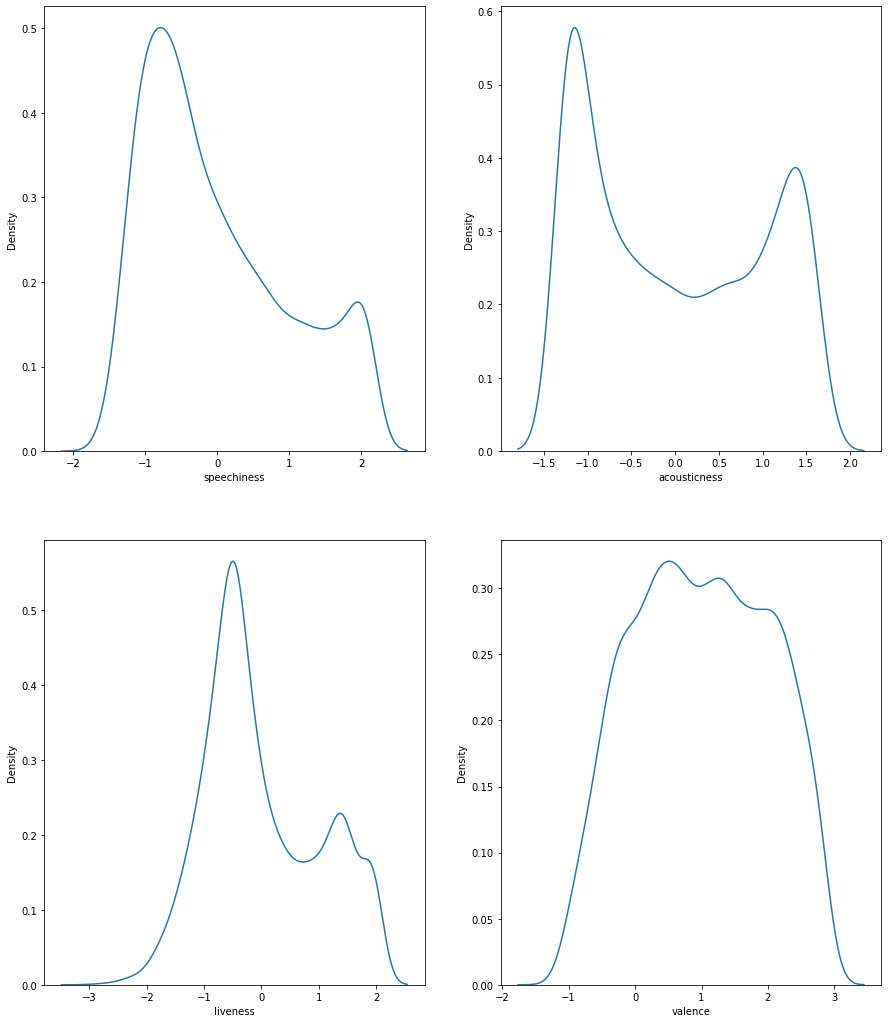

In [14]:
createKDeplot(df,['speechiness', 'acousticness', 'liveness', 'valence'])

### Original Song & Cover Song

In [15]:
originalSongId = 180849 # The Scientist Original
originalSongIndex,originalSongVector = getIndexAndVector(originalSongId, ids, df)
coverSongId = 1686718 # THe Scientist by Boyce Avenue
coverIndex,coverSongVector = getIndexAndVector(coverSongId, ids, df)

### Get Rankings

In [16]:
ranksDF  = applyEuclideanDistance(df, ids, originalSongVector)

In [17]:
ranksDF.head(10)

,id,rank
0,6001027,0.000000
1,180849,0.000000
2,1874688,0.540161
3,924061,0.553921
4,1747044,0.644730
5,6000395,0.730403
6,1680532,0.732680
7,6001230,0.741854
8,188071,0.752359
9,1104043,0.783418


In [18]:
ranksDF[ranksDF['id']==coverSongId]

,id,rank
313,1686718,1.730954


🥳 First recommendation

In [23]:
ranksDF.loc[(ranksDF['id'] > 5000000) & (ranksDF['id'] < 6000000)]

,id,rank
93,5000008,1.257849
257,5000023,1.636536
269,5000011,1.663620
314,5000013,1.730954
574,5000017,2.025490
780,5000001,2.239079
1015,5000007,2.416143
1285,5000018,2.610033
1692,5000012,2.866503
1799,5000020,2.925661
